In [183]:
import random
import conf
import importlib
import numpy as np

importlib.reload(conf)
from conf import *

In [184]:
p = {"beta": 10, "J": 1, "L": 10}
k = Wolrdline(**p)
k.initial_spin[5] = 1
k.initial_spin[1] = 1
print(k.initial_spin)

[-1, -1, -1, -1, -1, 1, -1, -1, -1, -1]


In [185]:
k.add_kinks(0, 1, [-1, 1])
k.add_kinks(0, 9, [1, -1])
k.add_kinks(1, 4, [-1, 1])
k.add_kinks(1, 5, [1, -1])
print(k.kinks)

[[kink(tau=1, spin=[-1, 1]), kink(tau=9, spin=[1, -1])], [kink(tau=4, spin=[-1, 1]), kink(tau=5, spin=[1, -1])], [], [], [], [], [], [], [], []]


In [186]:
ups = k.get_ups()

In [187]:
ups.shape

(6, 3)

(-1.0, 11.0)

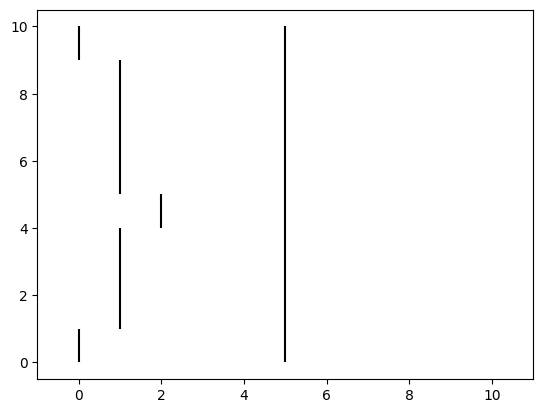

In [188]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
if ups.shape[0] != 0:
    ax.vlines(ups[:, 2], ups[:, 0], ups[:, 1], color="black")
ax.set_xlim(0 - 1, p["L"] + 1)

In [189]:
l = [1, 2]
l.append(3)